In [1]:
import yfinance as yf
import pandas as pd
import os

**Load sp500.csv**

In [24]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [25]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-02 00:00:00-05:00,6830.959961,6851.549805,6806.709961,6829.370117,4582290000,0.0,0.0
2025-12-03 00:00:00-05:00,6815.290039,6862.419922,6810.430176,6849.720215,4736780000,0.0,0.0
2025-12-04 00:00:00-05:00,6866.470215,6866.470215,6827.120117,6857.120117,4872440000,0.0,0.0


**Take away the time from the end of Date**

In [28]:
sp500.index = sp500.index.tz_localize(None).normalize()

In [30]:
sp500.index

DatetimeIndex(['1927-12-30', '1928-01-03', '1928-01-04', '1928-01-05',
               '1928-01-06', '1928-01-09', '1928-01-10', '1928-01-11',
               '1928-01-12', '1928-01-13',
               ...
               '2025-11-24', '2025-11-25', '2025-11-26', '2025-11-28',
               '2025-12-01', '2025-12-02', '2025-12-03', '2025-12-04',
               '2025-12-05', '2025-12-08'],
              dtype='datetime64[ns]', name='Date', length=24601, freq=None)

**Cleaning and Visualizing The Data**

SP500 Price History Chart

<Axes: xlabel='Date'>

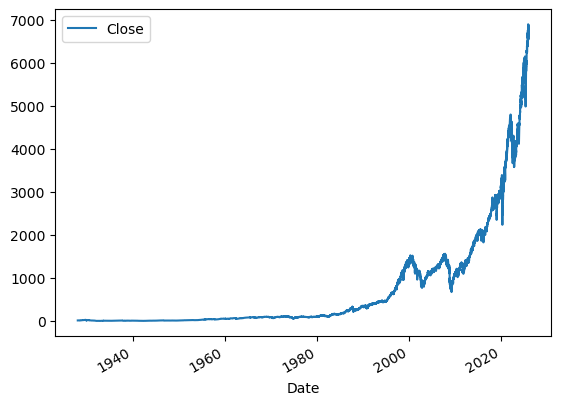

In [31]:
sp500.plot.line(y="Close", use_index=True)

Remove dividends and stock splits to clean data

In [33]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [34]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [35]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-12-02,6830.959961,6851.549805,6806.709961,6829.370117,4582290000,6849.720215
2025-12-03,6815.290039,6862.419922,6810.430176,6849.720215,4736780000,6857.120117
2025-12-04,6866.470215,6866.470215,6827.120117,6857.120117,4872440000,6870.399902
